## 0. Imports

In [111]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from implementations import * 
from proj1_helpers import *
from helpers import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Load data

In [129]:
# just load the train data set
data_path = "../dataset/train.csv"
y_raw, x_raw, col_labels = load_csv_data(data_path)
y,x = equalize_predictions(y_raw,x_raw)

y.shape, x.shape

((171334,), (171334, 30))

In [367]:
_,data_u,ids_u = load_csv_data("../dataset/test.csv")
data_u.shape

(568238, 30)

## 2. fill with nan values where there are invalid entries 

In [252]:
# example
k = np.array([
    [1,     0, -999],
    [7,     2,   -5],
    [-7,    0,    5],
    [-999, -1,    5],
    [-7,    2, -999]
])

print(k)
print()

# fill
nan_values = [-999, 0]
k = fill_with_nan_list(k, nan_values)
print(k)
print()

# ->>>> NB: probably better to substitute after standardization at step 5 <<<<-

# generate meaningful values with: 
# - np.nanmean(x, axis=0) (mean of each colum without considering nan values)
# - np.nanmedian(x, axis=0) (mean of each colum without considering nan values)
# - np.nanstd(x, axis=0) (mean of each colum without considering nan values)
k = sustitute_nans(k, substitutions=[-100, -200, -300]) 
# e.g. x = sustitute_nans(x, substitutions=np.nanmean(x, axis=0)) 
print(k)

[[   1    0 -999]
 [   7    2   -5]
 [  -7    0    5]
 [-999   -1    5]
 [  -7    2 -999]]

[[  1.  nan  nan]
 [  7.   2.  -5.]
 [ -7.  nan   5.]
 [ nan  -1.   5.]
 [ -7.   2.  nan]]

[[   1. -200. -300.]
 [   7.    2.   -5.]
 [  -7. -200.    5.]
 [-100.   -1.    5.]
 [  -7.    2. -300.]]


In [368]:
from implementations import *
x = fill_with_nan_list(x_raw, nan_values=[0, -999])
#x = drop_corr_columns(x)

data_u = fill_with_nan_list(data_u,nan_values=[0,-999])
#data_u = drop_corr_columns(data_u)


x.shape,data_u.shape

((171334, 30), (568238, 30))

## 3. standardize (it won't consider the np.nan entries)

In [369]:
x, mean_x, std_x = standardize(x)
data_u, mean_u,std_u = standardize(data_u)
x.shape,data_u.shape

((171334, 30), (568238, 30))

## 4. either drop_nan_rows/column or substitute nan values with something meaningful

In [370]:
# check drop_nan_rows/columns and sustitute_nans in implementations.py
# np.nanmean(x, axis=0) should be an array of 0s (the column are standardized)
x = sustitute_nans(x, substitutions=np.nanmean(x, axis=0)) 
data_u = sustitute_nans(data_u, substitutions=np.nanmean(x, axis=0)) 

x.shape,data_u.shape

((171334, 30), (568238, 30))

## 5. train and test models:

### Ridge regression with cross validation

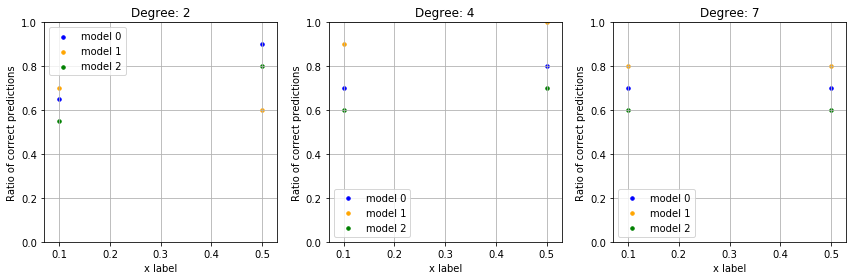

In [235]:
# just show how the function ratios_visualization works

model1 = np.array([
    [0.65, 0.9], # relative to degrees[0]
    [0.7, 0.8],  # relative to degrees[1]
    [0.7, 0.7]]) # relative to degrees[2]
model2 =  np.array([
    [0.7, 0.6],  # relative to degrees[0]
    [0.9, 1],    # relative to degrees[1]
    [0.8, 0.8]]) # relative to degrees[2]
degree_list = np.array([2, 4, 7])
lambdas = np.array([0.1, 0.5]) # x asis
 
ratios_visualization([model1, model2, model1-0.1], degree_list, lambdas, x_label="x label", log_axis_x=False, 
                     save_figure_with_name="test_figure")

In [236]:
# the lambda of the ridge regression does not affect much the model
nlambdas = 3
lambdas = np.linspace(0, 1000, nlambdas)

num_K_sets = 5
degree_list = [2, 3, 4]

ratio_tr, ratio_te = cross_validation_ridge_regression(x, y, num_K_sets, degree_list, lambdas)

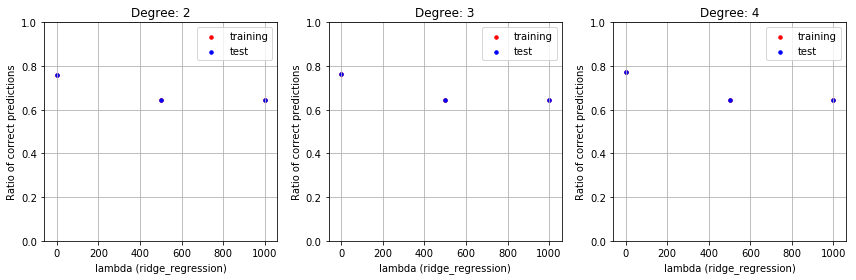

[    0.   500.  1000.]


((3, 3), (3, 3))

In [237]:
# there is A LOT of data => there is no overfitting => the training error is close to the test error => it does
# not makes sense to do the cross validation (just use the whole set to train the data and compute the 
# SUCCESS_RATIO on the training data)
cross_validation_visualization(ratio_tr, ratio_te, degree_list, lambdas, "lambda (ridge_regression)")

print(lambdas)
ratio_tr.shape, ratio_te.shape

### Ridge regression without cross validation

In [238]:
# the lambda of the ridge regression does not affect mush the model
nlambdas = 3
lambdas = np.linspace(0, 1000, nlambdas)
degree_list = [2, 3, 4]

ratios = ridge_regression_tuning(x, y, degree_list, lambdas)

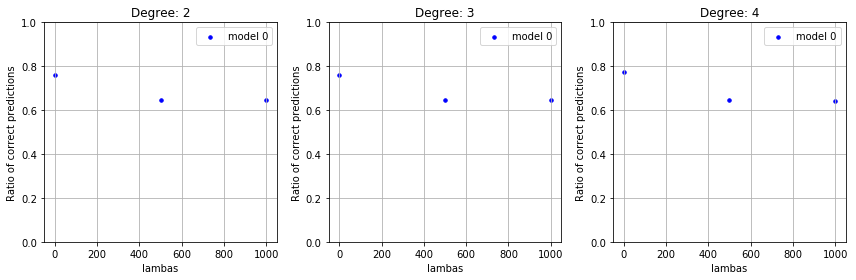

[    0.   500.  1000.]


In [239]:
x_axis = lambdas
figure_name = "ridge regression,nan_values=[0, -999],substitutions=nanmean(x, axis=0)"
ratios_visualization([ratios], degree_list, x_axis, x_label="lambas", log_axis_x=False,
                    save_figure_with_name=figure_name)

print(lambdas)

### Gradient descent try

ValueError: shapes (1,241) and (171334,) not aligned: 241 (dim 1) != 171334 (dim 0)

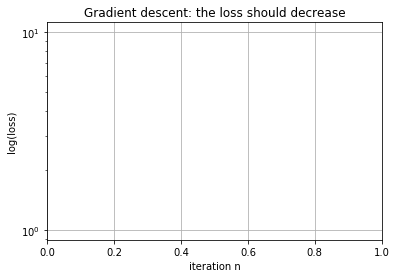

In [240]:
degree = 8
tx = build_poly(x, degree) 
initial_w = np.zeros(len(y))
max_iters = 20
gamma = 0.5
loss, w = gradient_descent(y, tx, initial_w, max_iters, gamma, batch_size=1)
loss,w

### Ridge Regression model selection

In [424]:

nb_degrees = 5
degree_start = 11
nb_lambdas = 20
degrees = range(degree_start,degree_start+nb_degrees)
degrees = range(10,15)
lambdas = np.linspace(1e-07,1e-9,nb_lambdas)
losses = np.array([nb_degrees,nb_lambdas])
best_w = np.array([len(y)])
best_loss = pow(10,100)
best_degree = 0
best_lambda = 0

for degree in degrees:
    tx = build_poly(x, degree) 
    for lambda_ in lambdas:
        loss,w = ridge_regression(y,tx,lambda_)
        if loss < best_loss:
            best_loss = loss
            best_w = w
            best_degree = degree
            best_lambda = lambda_
            

            
            
best_loss,best_lambda,best_degree
        
                                  

(0.287033849644939,
 3.2263157894736827e-08,
 12,
 array([ -1.33877760e+00,   5.32564898e-01,  -4.30994061e-01,
         -3.79903246e-01,   2.45423731e-01,   3.97269609e-01,
         -1.10568665e-01,  -1.03616179e-01,   2.83561072e-01,
         -2.73612553e-03,  -2.74947895e+00,   2.73078889e-02,
         -2.94698996e-02,   1.09029635e-01,   1.07535721e+00,
          1.11816473e-02,  -8.17189611e-03,   5.62317047e-01,
         -2.72146997e-02,   1.67455372e-02,  -8.06712978e-02,
         -3.44872249e-03,  -5.25004880e-02,   2.51480118e+00,
          2.37957527e-01,  -1.00940943e-02,   1.80000551e-02,
          1.72538255e-01,  -8.96617567e-03,   6.01341502e-02,
          2.36429019e+00,  -6.62025579e-01,  -2.04161161e-01,
         -2.69503593e-01,   1.08648667e-01,   3.57529401e-02,
          2.68243536e-01,  -1.25175609e-01,   1.00314367e-01,
         -1.65524839e-02,  -3.46539526e-01,  -3.41837127e-03,
          2.20490980e-01,   1.05756451e+00,  -1.74482535e-01,
          2.81488385

### Gradient Descent model selection

(0.44317430332446467, 9.9999999999999993e-41)

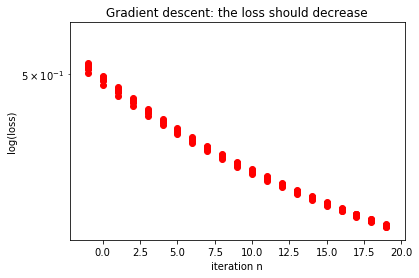

In [441]:
from implementations_sol import *

tx = build_poly(x,1)
max_iters = 20

nb_gammas = 10
nb_weights = 5
gammas = np.linspace(1e0,1e-4,nb_gammas)
weights = np.linspace(1e0,1e-2,nb_weights)

best_w
best_loss = 10**100
best_gamma = 0
best_weight = 0

for i in range(10):
    initial_w = np.random.rand(tx.shape[1])-np.ones(tx.shape[1])
    
    initial_w = initial_w*weight
    loss,w = gradient_descent(y, tx, initial_w, max_iters, 0.01)
    if loss<best_loss:
        best_loss = loss
        best_w = w
        best_gamma = gamma
        best_weight = weight

        

best_loss,best_gamma

(0.37098988178164399, 0.33333666666666667, 0.044445333333333337)

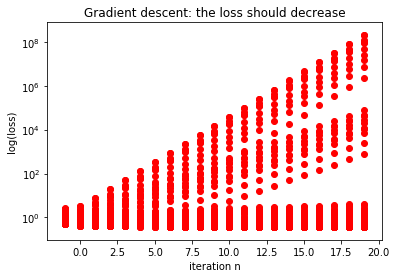

In [448]:
from implementations_sol import *

tx = build_poly(x,1)
max_iters = 20

nb_gammas = 10
nb_weights = 10
gammas = np.linspace(0.5,1e-5,nb_gammas)
weights = np.linspace(0.4,1e-6,nb_weights)

best_w
best_loss = 10**100
best_gamma = 0
best_weight = 0

for weight in weights:
    for gamma in gammas:
        initial_w = np.random.rand(tx.shape[1])-np.ones(tx.shape[1])
        initial_w = initial_w*weight
        loss,w = gradient_descent(y, tx, initial_w, max_iters, gamma)
        if loss>10:
            print(weight)
            print(gamma)
            print("------")
        if loss<best_loss:
            best_loss = loss
            best_w = w
            best_gamma = gamma
            best_weight = weight

        

best_loss,best_gamma,best_weight

(0.36629128737930344,
 array([ -8.71204529e-16,   1.09318794e-02,  -2.70343552e-01,
         -3.01334861e-01,   6.26936757e-03,   1.40818333e-01,
          6.72075994e-02,   1.77686860e-02,   3.41447462e-01,
         -1.48245249e-02,   1.29806482e-01,  -2.49804068e-01,
          1.32642982e-01,   1.50796020e-01,   1.68713108e-01,
          1.90810995e-04,  -9.12309401e-04,   3.33928731e-01,
          1.11746285e-03,   4.18027753e-03,   9.84334665e-02,
          1.09332568e-03,  -5.61985002e-02,   4.73318051e-02,
         -6.94503037e-03,  -4.34293171e-04,  -1.10073277e-03,
         -3.51863705e-02,   3.55987309e-03,  -3.60989090e-03,
         -1.49393234e-01]),
 0.33333666666666667,
 0.77705459280456057)

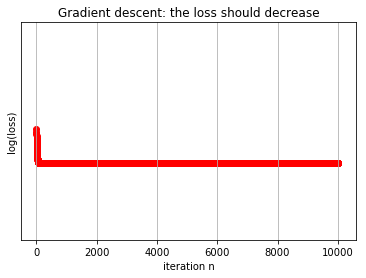

In [450]:
final_loss,final_w = gradient_descent(y,tx,best_w,10000,best_gamma)

final_loss,final_w, best_gamma,np.linalg.norm(final_w)

### Exportation

In [257]:

test_model_and_export(data_u,ids_u,best_w,best_degree)

